# Gaussian Mixture


## Reading dataset

In [1]:
from assignment_3.clustering.mnist import read_MNIST_small

data = read_MNIST_small()
data

Reading small MNIST. 
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\pixels_s.csv 
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\labels_s.csv 


[Length: 14000; Features: 784]

In [2]:
X, y = data

## Construct iteration

We test varying number of components from 2 to 200 and a number of cluster in range [6, 15]

In [3]:
from assignment_3.clustering.model.clustering import KMeansEvaluation

km_evaluation = KMeansEvaluation(
    data=data,
    n_components=[2, 5, 10, 30, 50, 80, 100, 120, 150, 200],
    hyperparameter=[6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    log_=True
)
km_evaluation

NormalizedCutEvaluation [n_components: [2, 5, 10, 30, 50, 80, 100, 120, 150, 200], k: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15], not evaluated]

In [4]:
%%time
km_evaluation.evaluate()

Processing number of components: 2 
  > Processed k: 6 [0.39468 s] 
  > Processed k: 7 [0.47057 s] 
  > Processed k: 8 [0.48479 s] 
  > Processed k: 9 [0.52097 s] 
  > Processed k: 10 [0.65378 s] 
  > Processed k: 11 [0.49149 s] 
  > Processed k: 12 [0.67844 s] 
  > Processed k: 13 [1.08073 s] 
  > Processed k: 14 [0.88260 s] 
  > Processed k: 15 [0.94763 s] 
Processing number of components: 5 
  > Processed k: 6 [0.27697 s] 
  > Processed k: 7 [0.44283 s] 
  > Processed k: 8 [0.51090 s] 
  > Processed k: 9 [0.58108 s] 
  > Processed k: 10 [0.89117 s] 
  > Processed k: 11 [0.80496 s] 
  > Processed k: 12 [1.22824 s] 
  > Processed k: 13 [1.84156 s] 
  > Processed k: 14 [1.87226 s] 
  > Processed k: 15 [2.48246 s] 
Processing number of components: 10 
  > Processed k: 6 [0.45726 s] 
  > Processed k: 7 [0.50783 s] 
  > Processed k: 8 [0.60385 s] 
  > Processed k: 9 [0.63796 s] 
  > Processed k: 10 [0.67032 s] 
  > Processed k: 11 [0.87302 s] 
  > Processed k: 12 [1.18532 s] 
  > Processe

The full evaluation took just 3 minutes and half.

In [5]:
km_evaluation.best_model

KMeans[N-rows: 14000; N-components: 30; Score: 0.9037891073852214, N-clusters: 15] [K: 15] 

The best model selected 15 number of clusters and in a 30-dimensional space. The best score is 0.90

Random Index trend:

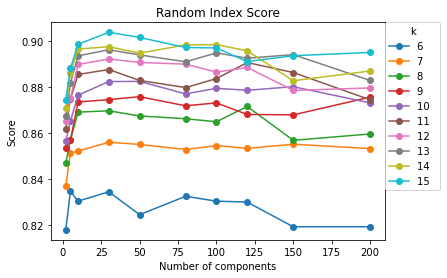

In [6]:
km_evaluation.plot_score(save=True, file_name="mg_score")

The cluster found trend is trivial:

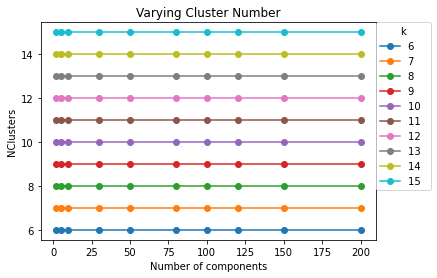

In [7]:
km_evaluation.plot_n_clusters(save=True, file_name="mg_clusters")

Trend of evaluation time:

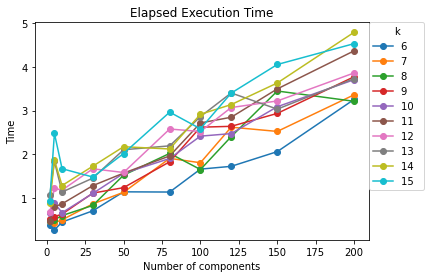

In [8]:
km_evaluation.plot_time(save=True, file_name="mg_time")

## Best model

Let's inspect clusters for the best model

In [9]:
best = km_evaluation.best_model

In [10]:
best

KMeans[N-rows: 14000; N-components: 30; Score: 0.9037891073852214, N-clusters: 15] [K: 15] 

In [11]:
from assignment_3.clustering.model.model import DataClusterSplit

clusters = DataClusterSplit(data=data, index=best.out)

In [12]:
clusters

ClusterDataSplit [Data: 14000, Clusters: 15, Mean-per-Cluster: 933.333, Score: 0.904] 

All clusters have a cardinality between 500 and 1400 so it's quite balanced.

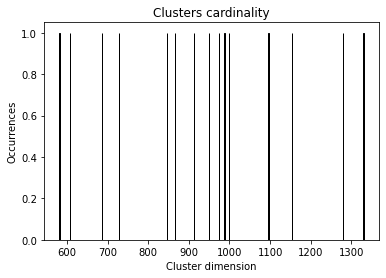

In [13]:
clusters.plot_frequencies_histo()

Let's plot the mean of the clusters:

[Mode 0: {0: 526, 6: 21, 5: 10, 2: 9, 9: 6, 3: 5, 8: 3, 7: 2}] 


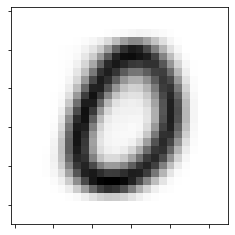

[Mode 3: {3: 810, 5: 208, 8: 63, 2: 49, 9: 12, 1: 5, 0: 4, 7: 2}] 


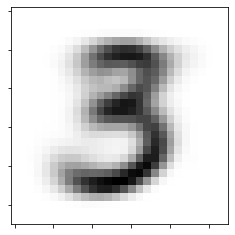

[Mode 7: {7: 631, 9: 37, 2: 29, 3: 15, 4: 7, 8: 4, 5: 3, 6: 2, 0: 1}] 


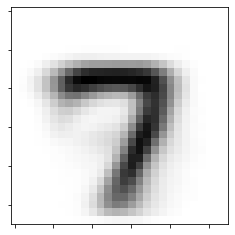

[Mode 5: {5: 421, 0: 213, 3: 61, 2: 54, 8: 40, 6: 26, 4: 20, 7: 7, 1: 4, 9: 1}] 


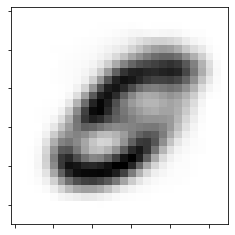

[Mode 6: {6: 633, 4: 19, 2: 13, 5: 7, 0: 6, 3: 3, 9: 2, 1: 2, 8: 1, 7: 1}] 


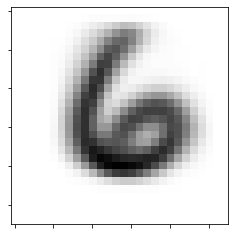

[Mode 9: {9: 581, 4: 510, 7: 70, 5: 67, 8: 33, 3: 32, 2: 30, 1: 3, 6: 3, 0: 1}] 


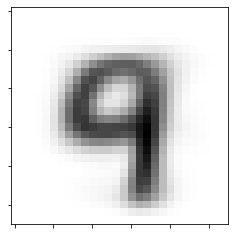

[Mode 8: {8: 868, 5: 93, 3: 56, 2: 47, 1: 12, 4: 7, 7: 4, 0: 4, 9: 3, 6: 2}] 


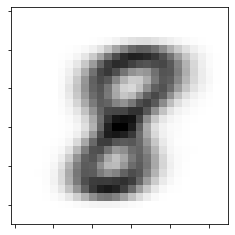

[Mode 9: {9: 520, 4: 467, 7: 182, 5: 56, 8: 27, 3: 11, 2: 7, 6: 3, 1: 3, 0: 3}] 


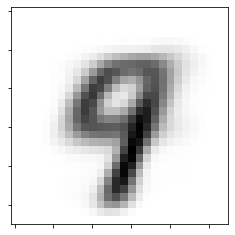

[Mode 1: {1: 808, 8: 45, 2: 38, 3: 33, 7: 25, 5: 23, 9: 17, 4: 7, 6: 3}] 


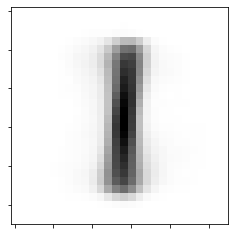

[Mode 6: {6: 684, 5: 65, 0: 52, 2: 23, 4: 19, 8: 15, 3: 6, 1: 2}] 


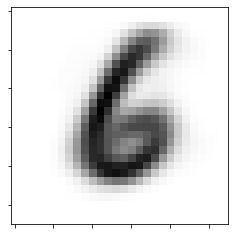

[Mode 0: {0: 540, 6: 37, 9: 7, 2: 6, 5: 5, 4: 5, 7: 4, 3: 2, 8: 1}] 


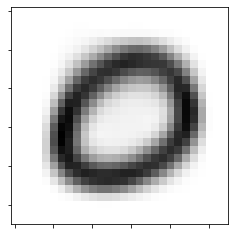

[Mode 1: {1: 728, 2: 96, 8: 30, 7: 25, 4: 16, 6: 6, 3: 5, 5: 5, 9: 2}] 


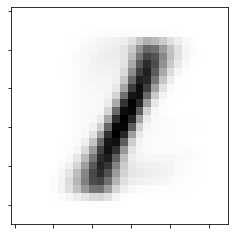

[Mode 3: {3: 349, 5: 313, 8: 204, 4: 38, 9: 28, 2: 27, 0: 18, 6: 6, 7: 4, 1: 1}] 


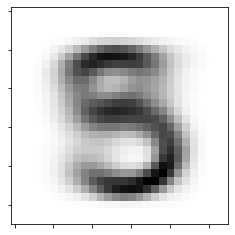

[Mode 2: {2: 906, 3: 28, 8: 11, 4: 10, 9: 7, 7: 5, 1: 4, 5: 2, 0: 1, 6: 1}] 


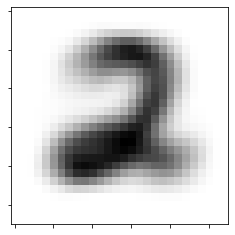

[Mode 7: {7: 470, 9: 237, 4: 184, 8: 22, 2: 20, 5: 11, 3: 4, 1: 1}] 


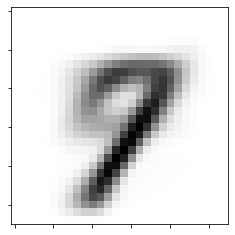

In [14]:
clusters.plot_mean_digit()